In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [5]:
#Open File
_df = pd.read_excel("./input/demo_input.xlsx")

selection = _df['Location'].isnull() | _df['latitude'].isnull() | _df['longitude'].isnull()
_df = _df[~selection].copy().reset_index().drop(columns='index')

data = _df[['latitude', 'longitude']].values.tolist()

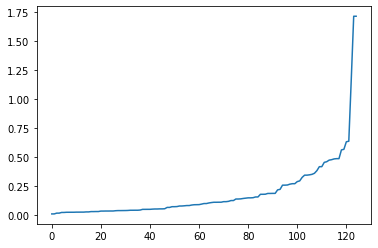

In [6]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [7]:
def name_group(x):
    if x == -1:
        return "NO Group"
    else:
        return "Group - " + str(x)

In [14]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply DBSCAN clustering
epsilon = 0.3  # Distance threshold to define the neighborhood
min_samples = 5  # Minimum number of samples in a cluster
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)
_df['Group'] = clusters
#-1 means site cannot be grouped.
_df['Group'] = _df['Group'].apply(name_group)

selection = _df['Group'] == "NO Group"
_df.loc[selection, 'Group'] = "NO Group - " + _df.loc[selection, 'Location'].astype(str)

_df.head(5)

,Location,latitude,longitude,Group
0,Location 1,53.547874,-2.195631,Group - 0
1,Location 2,51.182814,-0.127771,Group - 1
2,Location 3,53.539492,-2.169141,Group - 0
3,Location 4,53.451990,-2.766049,Group - 0
4,Location 5,53.536908,-1.041846,Group - 2


In [15]:
print(_df["Group"].value_counts(dropna=False))
print(_df["Group"].value_counts(dropna=False).sum())

Group - 1                  32
Group - 0                  29
Group - 2                  18
NO Group - Location 96      1
NO Group - Location 71      1
NO Group - Location 72      1
NO Group - Location 74      1
NO Group - Location 77      1
NO Group - Location 79      1
NO Group - Location 83      1
NO Group - Location 89      1
NO Group - Location 93      1
NO Group - Location 95      1
NO Group - Location 97      1
NO Group - Location 116     1
NO Group - Location 67      1
NO Group - Location 100     1
NO Group - Location 103     1
NO Group - Location 108     1
NO Group - Location 109     1
NO Group - Location 111     1
NO Group - Location 113     1
NO Group - Location 114     1
NO Group - Location 115     1
NO Group - Location 98      1
NO Group - Location 64      1
NO Group - Location 65      1
NO Group - Location 31      1
NO Group - Location 6       1
NO Group - Location 7       1
NO Group - Location 11      1
NO Group - Location 19      1
NO Group - Location 21      1
NO Group -